In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [4]:
df = pd.read_csv('/content/sample_data/wholesome_customers_data.csv')

In [5]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


<Axes: xlabel='Milk', ylabel='Grocery'>

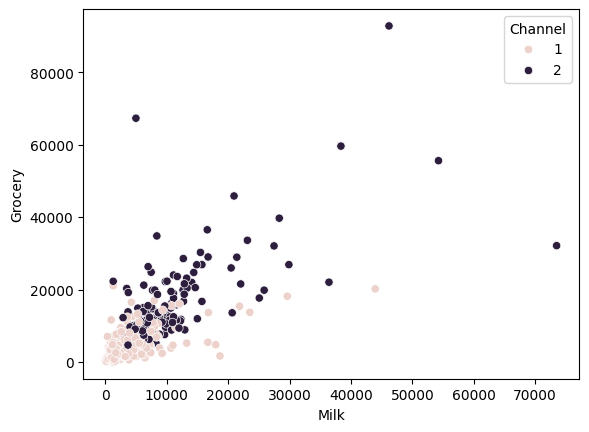

In [7]:
sns.scatterplot(data=df, x = 'Milk', y ='Grocery',hue='Channel')

<Axes: xlabel='Milk', ylabel='Count'>

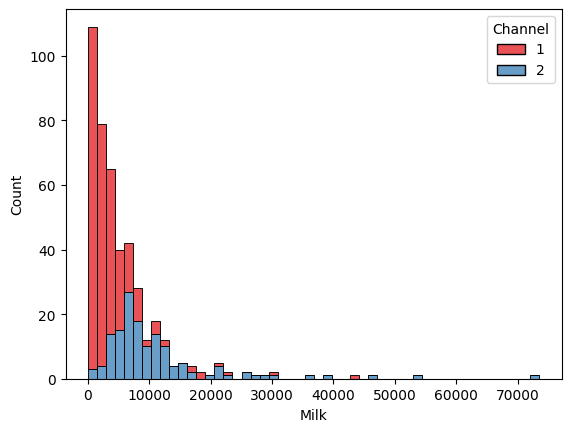

In [10]:
sns.histplot(data=df, x='Milk', hue='Channel', palette='Set1',multiple='stack' )

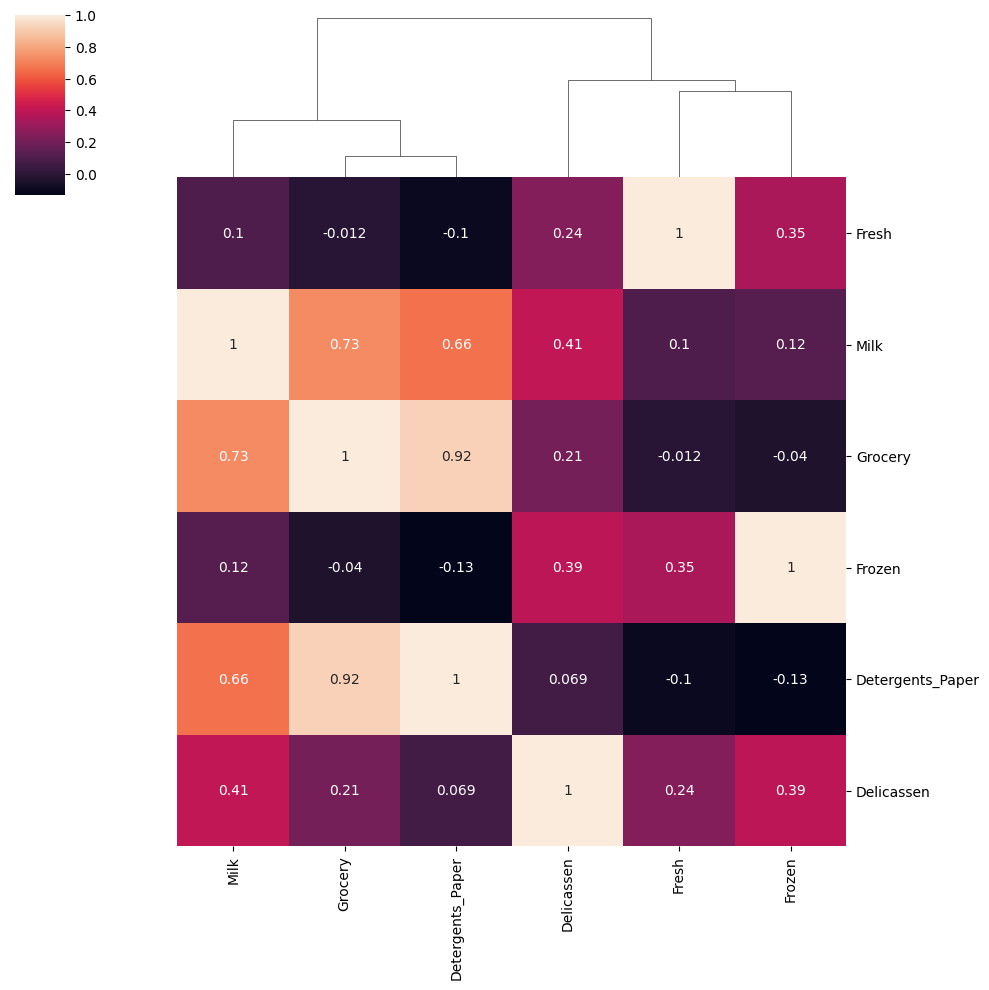

In [13]:
sns.clustermap(df.drop(['Region','Channel'],axis=1).corr(), annot=True, row_cluster=False)

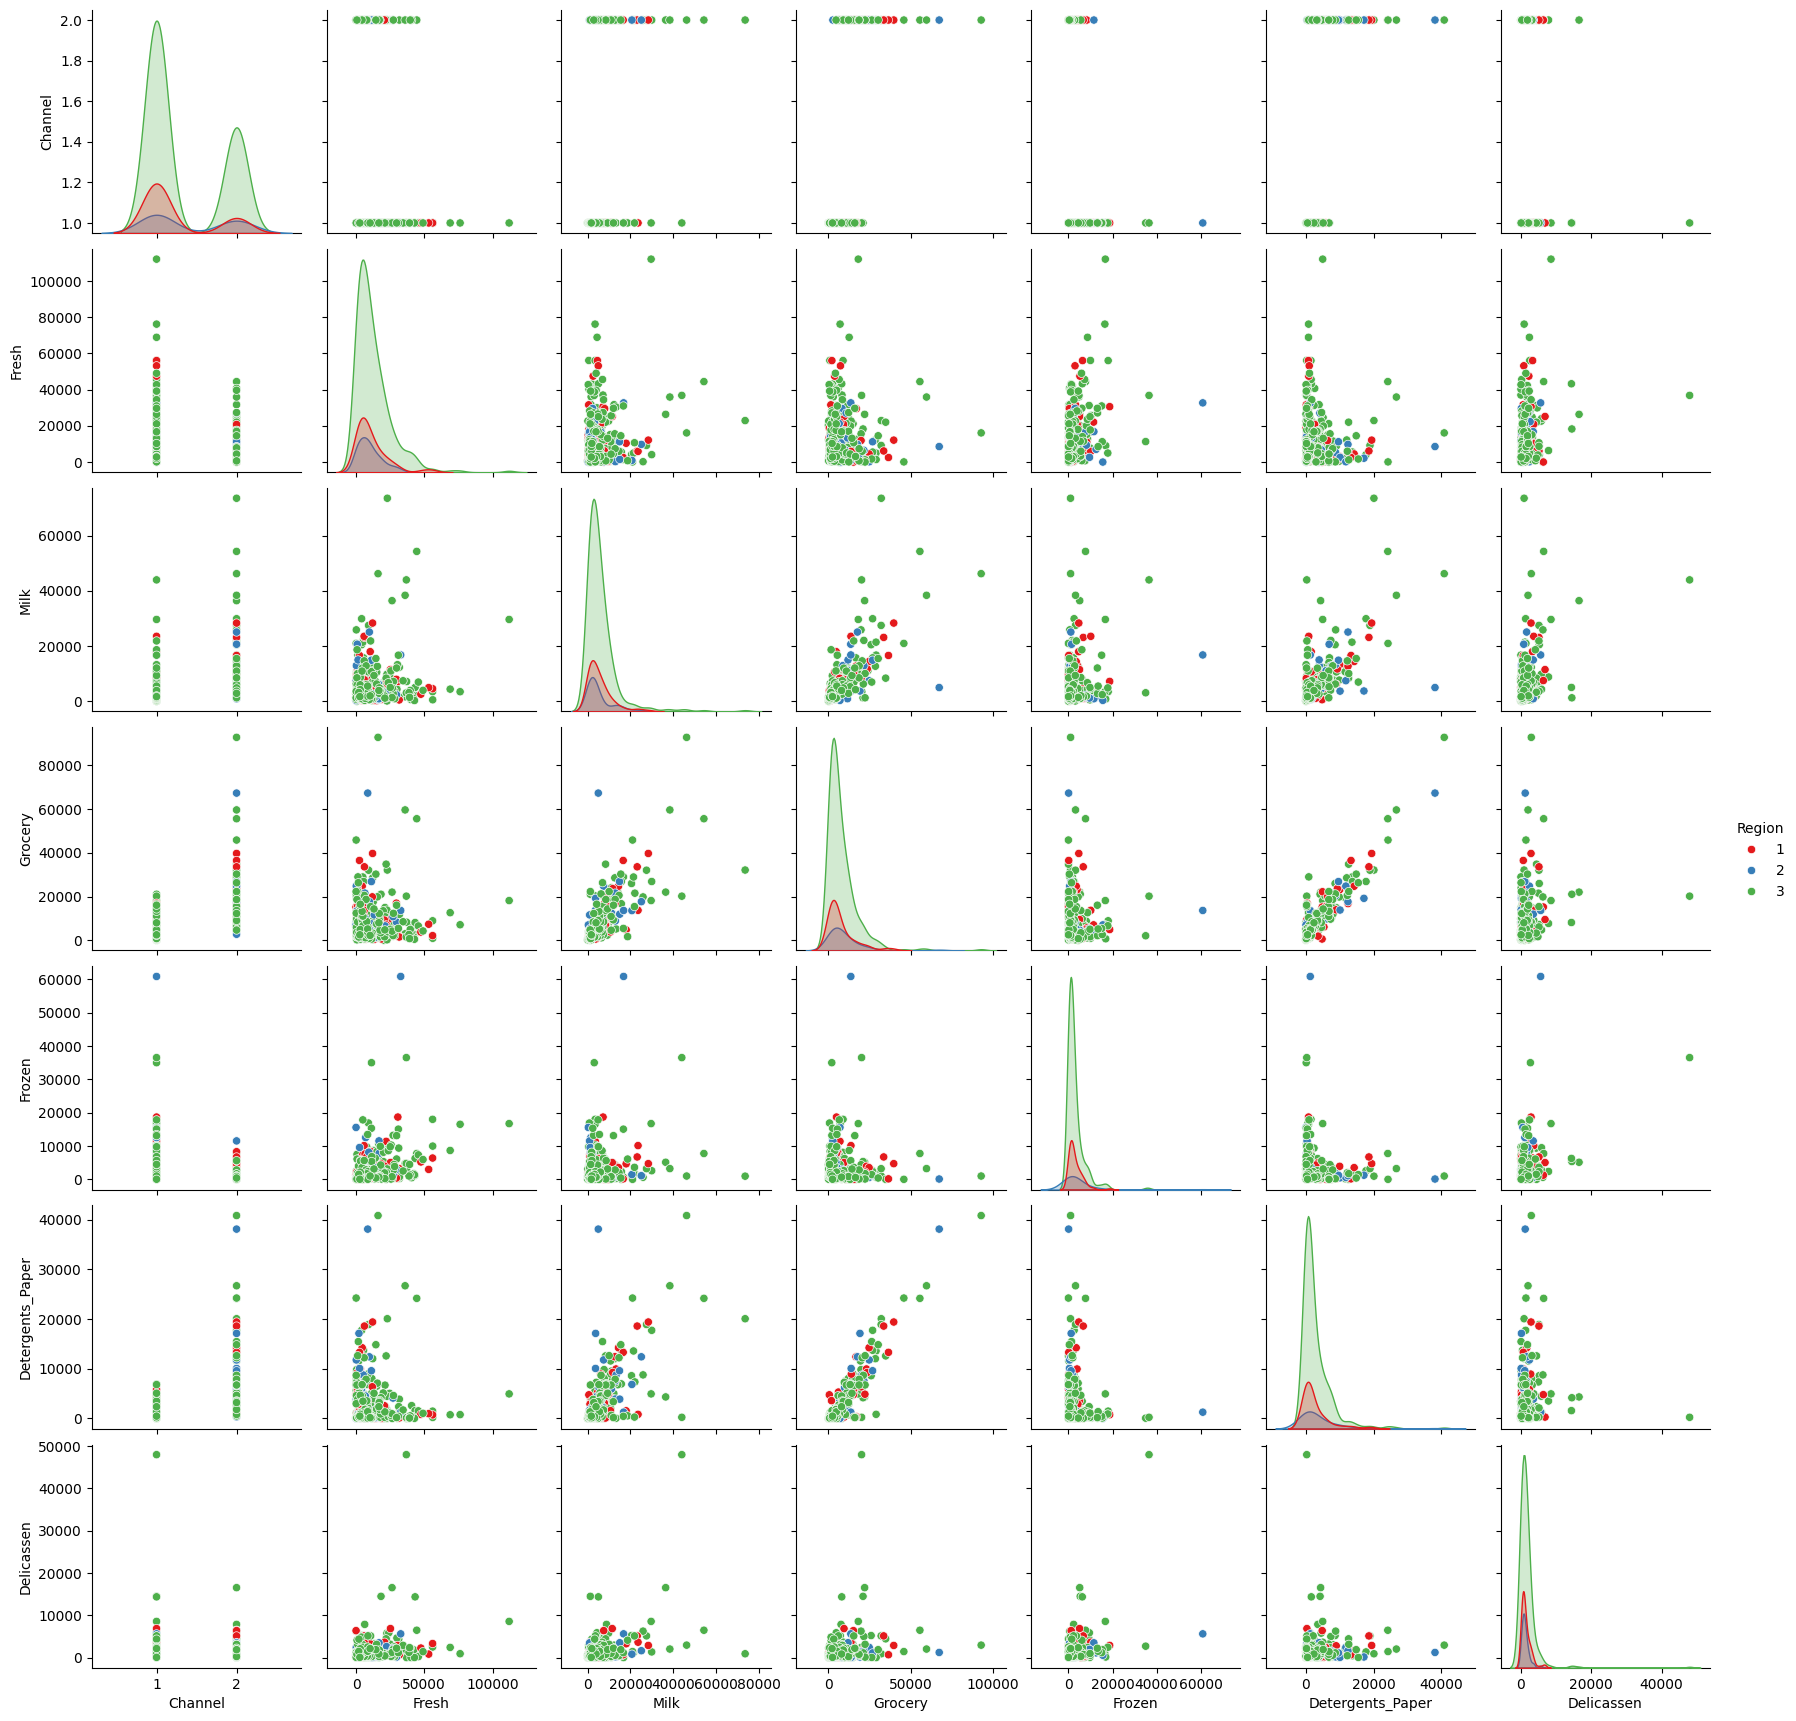

In [14]:
sns.pairplot(df,hue='Region', palette='Set1')

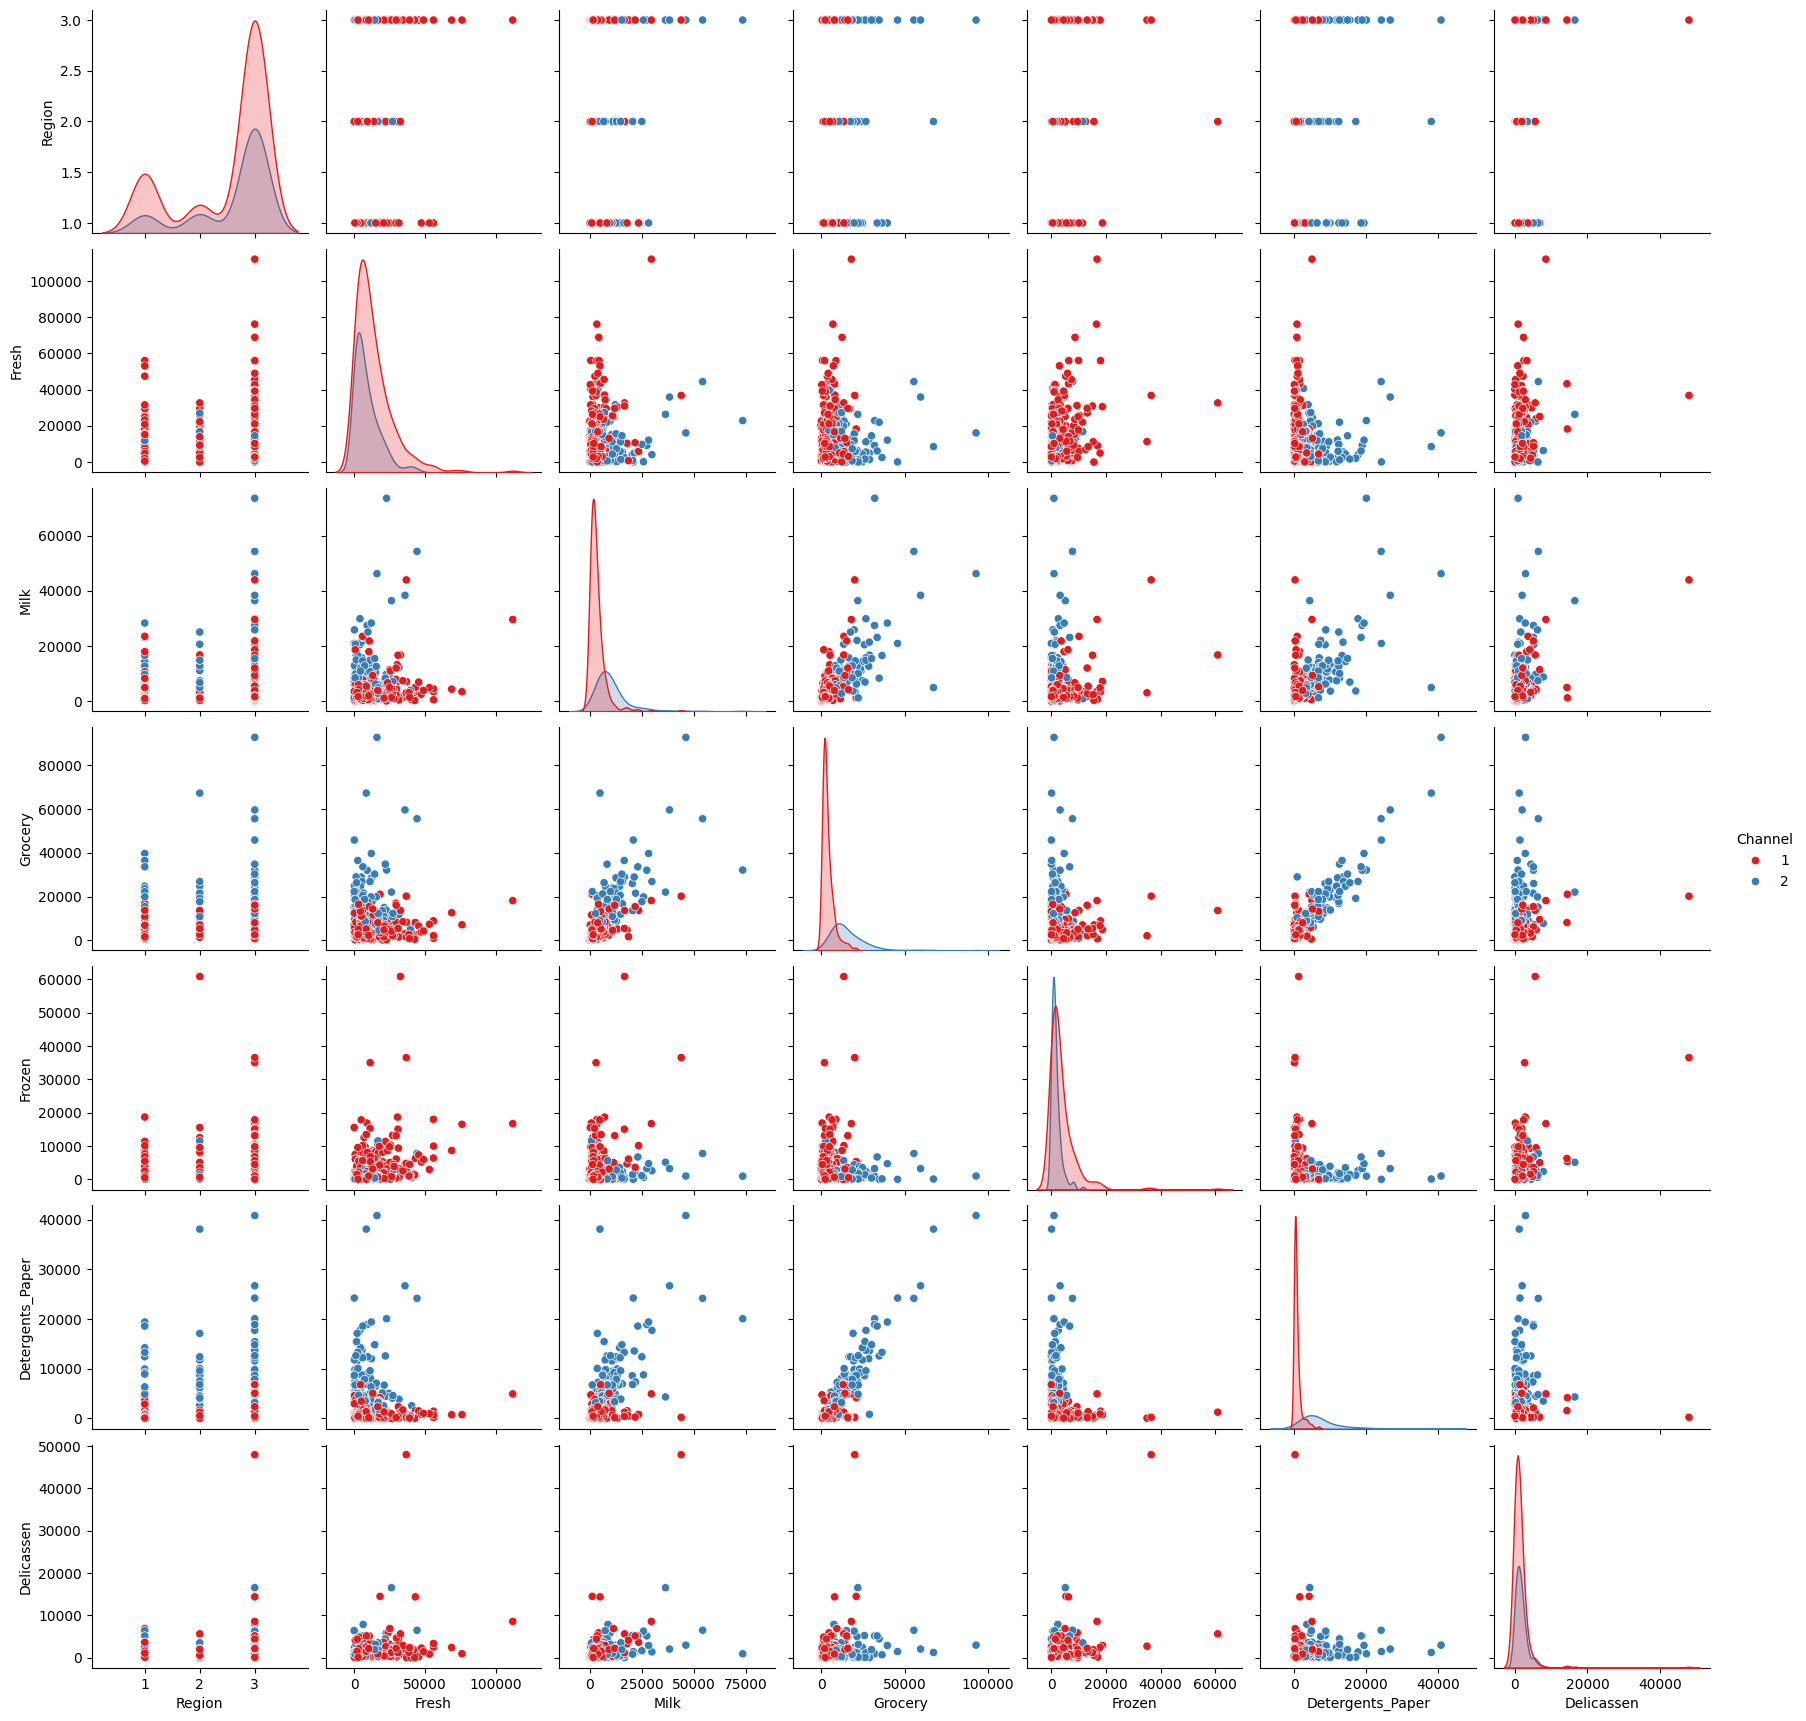

In [15]:
sns.pairplot(df,hue='Channel', palette='Set1')

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X = scaler.fit_transform(df)

In [21]:
outlier_perc = []

for eps in np.linspace(0.001, 3,50):
  dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
  dbscan.fit(scaled_X)
  outlier_perc.append(len(dbscan.labels_[dbscan.labels_==-1])/len(dbscan.labels_))


<Axes: >

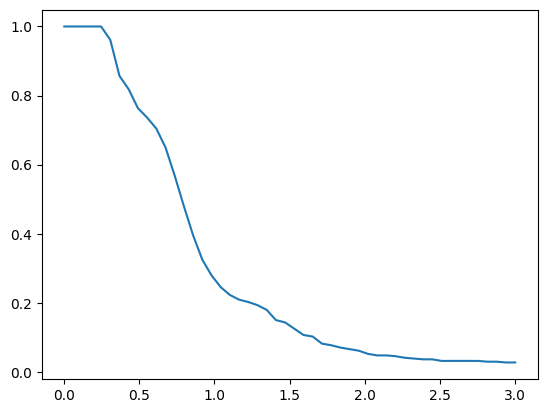

In [22]:
sns.lineplot(x=np.linspace(0.001, 3,50), y=outlier_perc)

In [23]:
dbscan = DBSCAN(eps=2,min_samples = scaled_X.shape[1])

In [24]:
dbscan.fit(scaled_X)

DBSCAN(eps=2, min_samples=8)

In [25]:
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

<Axes: xlabel='Grocery', ylabel='Milk'>

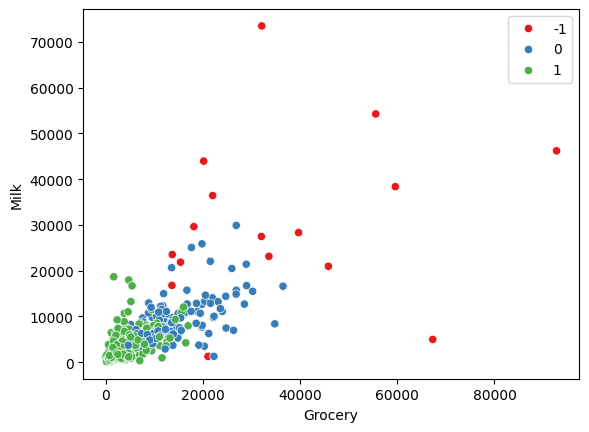

In [27]:
sns.scatterplot(data=df, x='Grocery', y = 'Milk', hue=dbscan.labels_, palette = 'Set1')

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

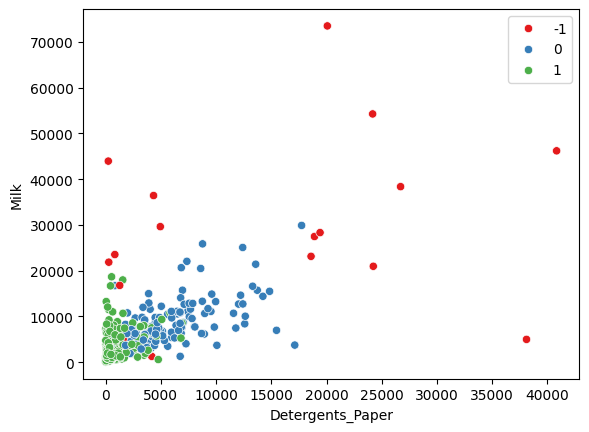

In [29]:
sns.scatterplot(data=df,
                x='Detergents_Paper',
                y = 'Milk',
                hue=dbscan.labels_,
                palette = 'Set1')

In [30]:
df['labels'] = dbscan.labels_

In [31]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [34]:
cats = df.drop(['Channel','Region'],axis=1)
cat_means = cats.groupby('labels').mean()

<Axes: ylabel='labels'>

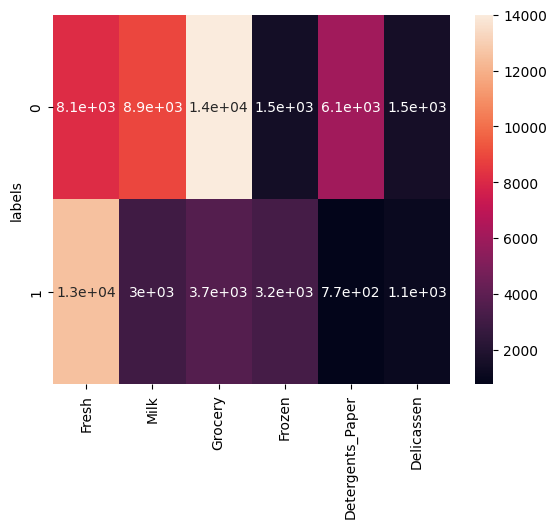

In [38]:
sns.heatmap(cat_means.loc[[0,1]],annot=True)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaled_cat = scaler.fit_transform(cat_means)

In [43]:
pd.DataFrame(scaled_cat,cat_means.index, columns=cat_means.columns)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.277723,0.411089,0.000000,0.475949,0.069925
1,0.214549,0.000000,0.000000,0.172714,0.000000,0.000000


<Axes: ylabel='labels'>

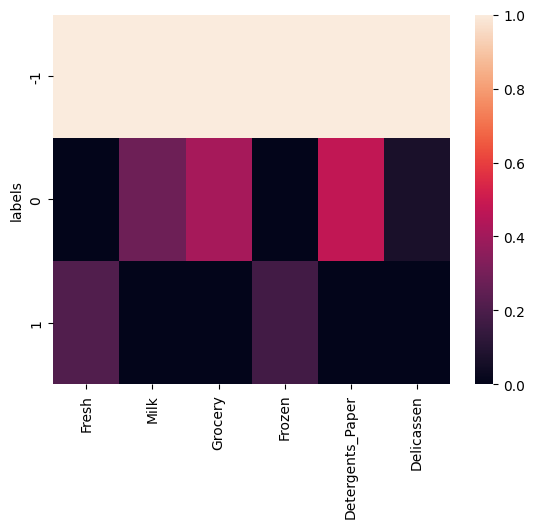

In [44]:
sns.heatmap(pd.DataFrame(scaled_cat,cat_means.index, columns=cat_means.columns))